<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Copia_de_Analisis_Datos_Abiertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos Abiertos
## TalentoTech
## Bootcamp de Inteligencia Artificial Nivel Innovador
### Integrantes:  
* Andrea Osorio
* Luis Murcia
* Silvana Jaramillo
* Yeison Rodriguez




# **Entendimiento del proyecto:**


* Analizar el rendimiento agrícola en el periodo 2011 en Cota, Cundinamarca, para una base de datos de 1000 registros, con relación a su área de siembra, área total, tipo de cultivo y producción.


# **Comprensión de los datos**

Esta es una copia de los conjuntos de datos de Datos Abiertos Evaluaciones Agropecuarias por consenso DEPARTAMENTO DE BOYACÁ https://www.datos.gov.co/d/u958-pr9h/visualization

In [ ]:
pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
# Leer los datos
# Importar librerìas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# URL del conjunto de datos
url = "https://www.datos.gov.co/resource/u958-pr9h.csv?$query=SELECT%0A%20%20%60tipo%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60cultivo%60%2C%0A%20%20%60periodo%60%2C%0A%20%20%60area_sembrada_ha%60%2C%0A%20%20%60area_cosechada_ha%60%2C%0A%20%20%60produccion_t%60%2C%0A%20%20%60rendimiento_t_ha%60%0AORDER%20BY%20%60periodo%60%20ASC%20NULL%20LAST"

# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df.head())


                   tipo     municipio          cultivo periodo  \
0  CULTIVOS PERMANENTES       OTANCHE             CAFE    2011   
1  CULTIVOS PERMANENTES  CHIQUINQUIRA  TOMATE DE ARBOL    2011   
2  CULTIVOS PERMANENTES      JENESANO         AGUACATE    2011   
3  CULTIVOS PERMANENTES      CORRALES              UVA    2011   
4  CULTIVOS PERMANENTES       BRICEÑO         CITRICOS    2011   

   area_sembrada_ha  area_cosechada_ha  produccion_t  rendimiento_t_ha  
0            103.00              40.00         32.00               0.8  
1             55.00              35.00        245.00               7.0  
2              9.33               5.18         62.19              12.0  
3              1.97               1.97          2.17               1.1  
4             62.00              60.00        480.00               8.0  


In [ ]:
# Informaciòn de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               1000 non-null   object 
 1   municipio          1000 non-null   object 
 2   cultivo            1000 non-null   object 
 3   periodo            1000 non-null   object 
 4   area_sembrada_ha   1000 non-null   float64
 5   area_cosechada_ha  1000 non-null   float64
 6   produccion_t       1000 non-null   float64
 7   rendimiento_t_ha   999 non-null    float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
# tamaño dataset
df.shape

(1000, 8)

In [ ]:
# leer columnas
df.columns

Index(['tipo', 'municipio', 'cultivo', 'periodo', 'area_sembrada_ha',
       'area_cosechada_ha', 'produccion_t', 'rendimiento_t_ha'],
      dtype='object')

In [ ]:
# Leer columnas de variables numericas
df.select_dtypes(np.number).columns

Index(['area_sembrada_ha', 'area_cosechada_ha', 'produccion_t',
       'rendimiento_t_ha'],
      dtype='object')

In [ ]:
# Describir datos estadisticos de variables numericas
df.describe(include=np.number).round(2)

,area_sembrada_ha,area_cosechada_ha,produccion_t,rendimiento_t_ha
count,1000.00,1000.00,1000.00,999.00
mean,106.44,57.38,748.69,8.26
std,401.52,114.11,3563.32,15.18
min,0.21,0.00,0.00,0.15
25%,8.00,5.89,17.75,1.40
50%,20.67,16.30,68.74,5.00
75%,70.00,51.00,281.25,10.00
max,8363.00,977.50,72398.50,200.00


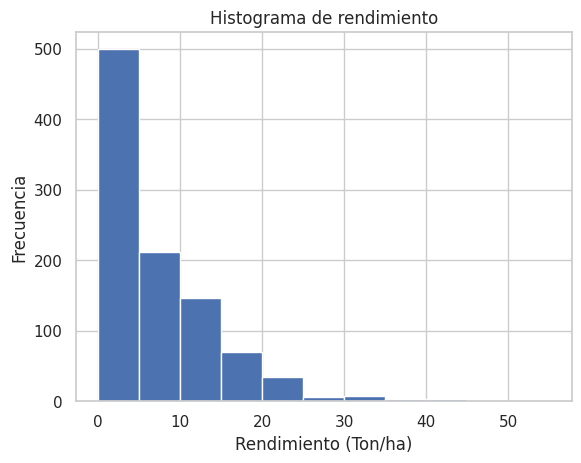

In [ ]:
#Histogramas de las variables numericas

plt.hist(df['rendimiento_t_ha'], bins=11, range=(0, 55))
plt.title('Histograma de rendimiento')
plt.xlabel('Rendimiento (Ton/ha)')
plt.ylabel('Frecuencia')
plt.show()

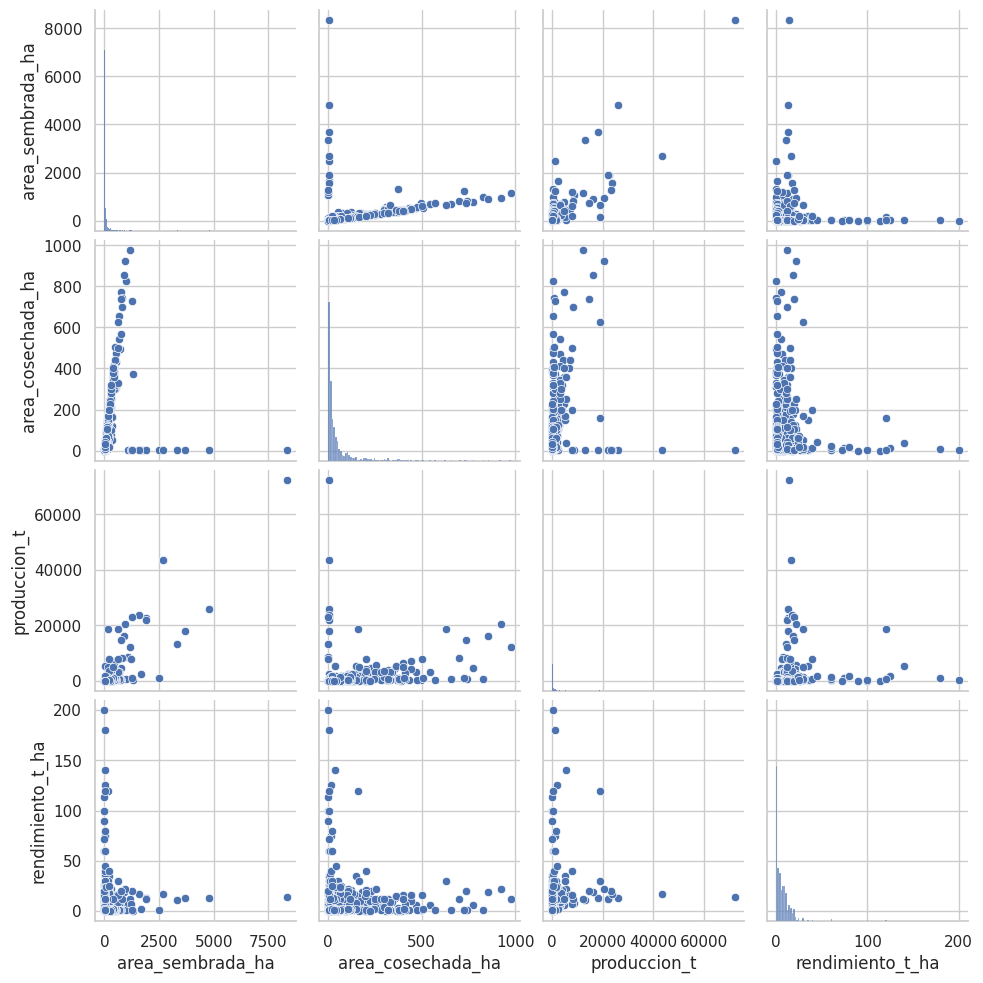

In [ ]:
# Graficar distribución de pares de variables
sns.pairplot(df)

# **Preparación de los datos**

In [ ]:
# Revisar númer de valores duplicados
df.duplicated().sum()

0

In [ ]:
# Revisar valores faltantes
df.isna().sum()

tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     1
dtype: int64

In [ ]:
df['rendimiento_t_ha'].value_counts(dropna=False) #REVISAR DATOS FALTANTES

rendimiento_t_ha
1.00     62
10.00    51
8.00     48
5.00     47
6.00     46
         ..
0.85      1
11.30     1
0.73      1
2.60      1
80.00     1
Name: count, Length: 151, dtype: int64

In [ ]:
df['rendimiento_t_ha'].value_counts(dropna=True)

rendimiento_t_ha
1.00     62
10.00    51
8.00     48
5.00     47
6.00     46
         ..
7.80      1
0.85      1
11.30     1
0.73      1
80.00     1
Name: count, Length: 150, dtype: int64

In [ ]:
df.isnull()

,tipo,municipio,cultivo,periodo,area_sembrada_ha,area_cosechada_ha,produccion_t,rendimiento_t_ha
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     1
dtype: int64

In [ ]:
df.isnull().sum().sum()

1

In [ ]:
(len(df)-df.count()).sum()

1

In [ ]:
median_age=df['rendimiento_t_ha'].median(axis=0)

median_age #calculo de la mediana

5.0

In [ ]:
df['rendimiento_t_ha'].fillna(median_age,inplace=True)
df['rendimiento_t_ha']

0       0.8
1       7.0
2      12.0
3       1.1
4       8.0
       ... 
995    40.0
996     1.0
997     1.4
998     2.1
999     1.2
Name: rendimiento_t_ha, Length: 1000, dtype: float64

In [ ]:
df.isnull().sum()

tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               1000 non-null   object 
 1   municipio          1000 non-null   object 
 2   cultivo            1000 non-null   object 
 3   periodo            1000 non-null   object 
 4   area_sembrada_ha   1000 non-null   float64
 5   area_cosechada_ha  1000 non-null   float64
 6   produccion_t       1000 non-null   float64
 7   rendimiento_t_ha   1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
import pandas as pd

# Calcular la frecuencia de cada categoría en la columna 'tipo'
frecuencia_tipo = df['tipo'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'municipio'
frecuencia_municipio = df['municipio'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'cultivo'
frecuencia_cultivo = df['cultivo'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'periodo'
frecuencia_periodo = df['periodo'].value_counts()

# Mostrar los resultados
print("Frecuencia de cada categoría en la columna 'tipo':")
print(frecuencia_tipo)
print("\nFrecuencia de cada categoría en la columna 'municipio':")
print(frecuencia_municipio)
print("\nFrecuencia de cada categoría en la columna 'cultivo':")
print(frecuencia_cultivo)
print("\nFrecuencia de cada categoría en la columna 'periodo':")
print(frecuencia_periodo)


Frecuencia de cada categoría en la columna 'tipo':
tipo
CULTIVOS PERMANENTES                487
CULTIVOS TRANSITORIOS SEMESTRE A    413
CULTIVOS ANUALES                    100
Name: count, dtype: int64

Frecuencia de cada categoría en la columna 'municipio':
municipio
SOATA                 20
SOCHA                 17
BELEN                 16
SUTATENZA             15
BUENAVISTA            15
                      ..
TOPAGA                 2
IZA                    2
SAN MIGUEL DE SEMA     2
MOTAVITA               1
PAJARITO               1
Name: count, Length: 122, dtype: int64

Frecuencia de cada categoría en la columna 'cultivo':
cultivo
MAIZ TRADICIONAL    79
ARVEJA              58
FRIJOL              57
PAPA                54
YUCA                44
                    ..
SAGU                 1
AJO                  1
PAPAYUELA            1
CLAVEL               1
BROCOLI              1
Name: count, Length: 89, dtype: int64

Frecuencia de cada categoría en la columna 'periodo':
periodo


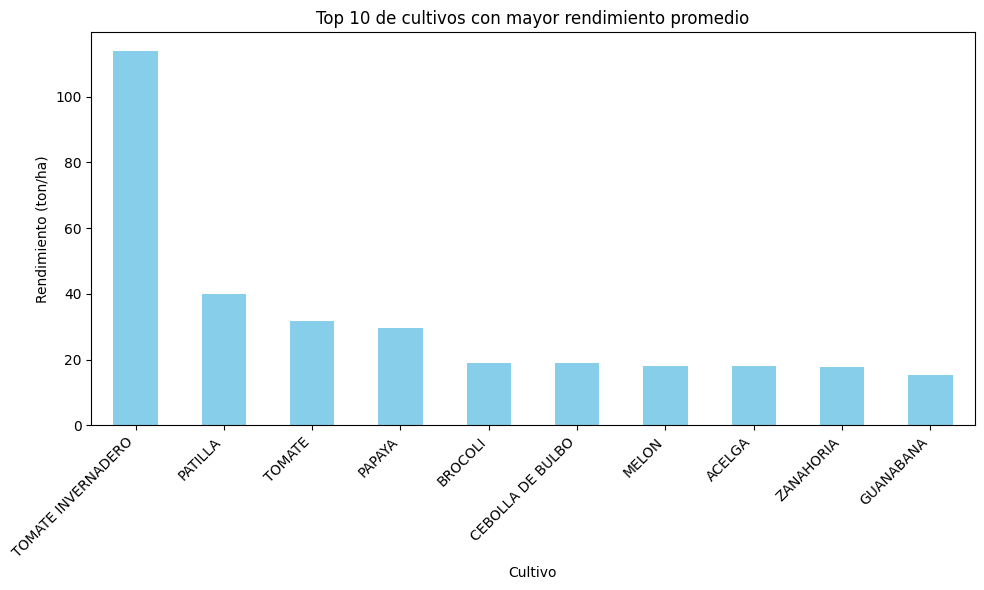

In [ ]:
# Agrupar por cultivo y calcular la productividad media
productividad_promedio = df.groupby('cultivo')['rendimiento_t_ha'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
productividad_promedio.plot(kind='bar', color='skyblue')
plt.title('Top 10 de cultivos con mayor rendimiento promedio')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (ton/ha)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

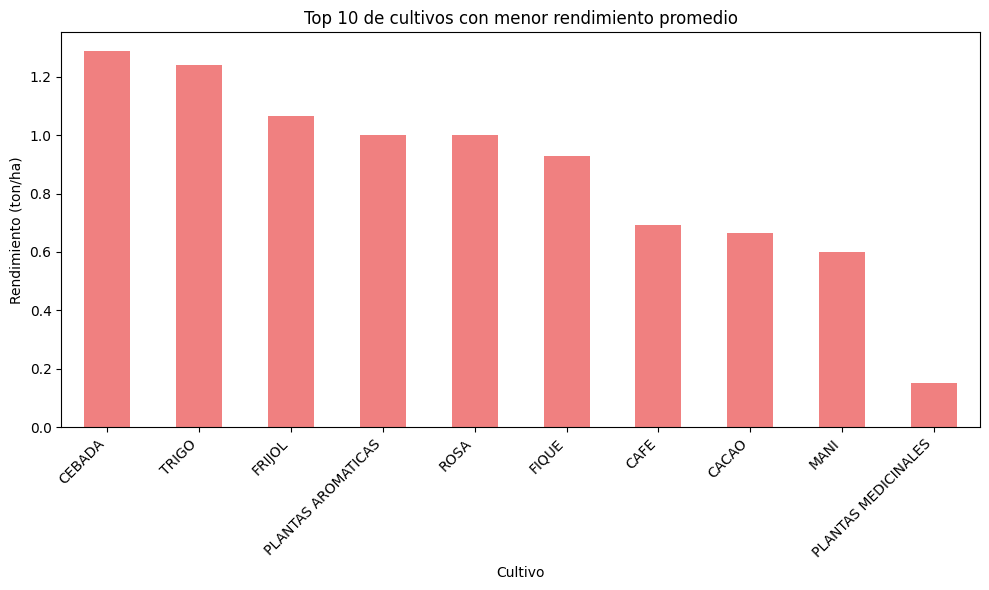

In [ ]:
# Agrupar por cultivo y calcular la productividad media
productividad_promedio = df.groupby('cultivo')['rendimiento_t_ha'].mean().sort_values(ascending=False).tail(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
productividad_promedio.plot(kind='bar', color='lightcoral')
plt.title('Top 10 de cultivos con menor rendimiento promedio')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (ton/ha)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()